Getting paper identifiers XXXX.YYYYY from listing: https://arxiv.org/list/astro-ph/new

Scraping paper: https://arxiv.org/pdf/2406.01666.pdf
Number of citations: 10 (++++++++++)

Scraping paper: https://arxiv.org/pdf/2406.01673.pdf
Number of citations: 2 (++)

Scraping paper: https://arxiv.org/pdf/2406.01683.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.01831.pdf
Number of citations: 19 (+++++++++++++++++++)

Scraping paper: https://arxiv.org/pdf/2406.02072.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2402.18515.pdf
Number of citations: 2 (++)

Scraping paper: https://arxiv.org/pdf/2405.19195.pdf
Total number of citations: 35
6/122 (4.9 %) of papers cite the author Calzetti, D.


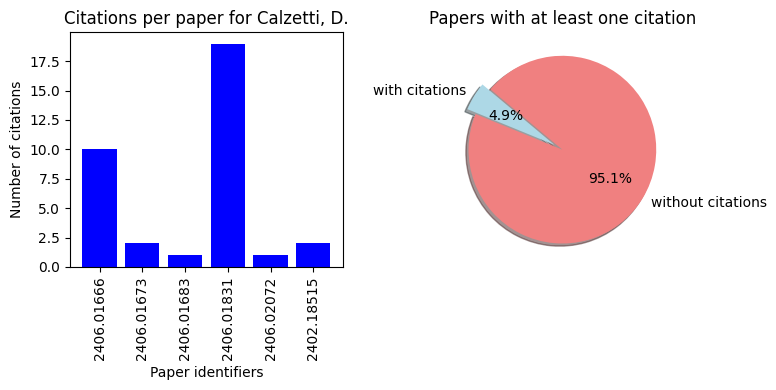

In [6]:
import requests
import re
from PyPDF2 import PdfReader
import os
import matplotlib.pyplot as plt

"""
This script scrapes the latest papers from specified categories on arXiv, extracts the text from their PDFs,
and searches for citations of a specified author within those papers. Then it prints the number of citations 
found in each paper, the total number of citations, and the percentage of papers that cite the author.

Workflow:
1. Fetches identifiers of the latest papers from arXiv in specified categories.
2. Constructs the URLs to access the PDFs of these papers.
3. Downloads each PDF and extracts its text.
4. Searches the extracted text for citations of the specified author.
5. Prints the number of citations found in each paper along with a visual representation using plus signs.
6. Displays the total number of citations and the percentage of papers that cite the author.
7. Removes the temporary PDF file after processing.
8. Plots the number of citations for each paper that has at least one citation.
9. Plots a pie chart showing the proportion of papers with at least one citation and papers with no citations.

Usage:
1. Set the 'author' variable to the name of the author you want to search for.
2. Run the script.

Requirements: 
1. PyPDF2 can be installed by running pip install PyPDF2 in the terminal.
2. Matplotlib can be installed by running pip install matplotlib in the terminal.
"""

# Function to get the latest paper identifiers
def get_latest_paper_identifiers():
    category = ['astro-ph','hep-ph','cond-mat']
    url = 'https://arxiv.org/list/' + category[0] + '/new'
    print(f'Getting paper identifiers XXXX.YYYYY from listing: {url}')
    print("")
    response = requests.get(url)
    identifiers = re.findall(r'arXiv:(\d+\.\d+)', response.text)
    return identifiers

# Function to get the pdf urls from the identifiers
def get_pdf_urls(identifiers):
    pdf_urls = [f"https://arxiv.org/pdf/{identifier}.pdf" for identifier in identifiers]
    return pdf_urls

# Function to extract text from PDF
def extract_text_from_pdf(pdf_url):
    text = ""
    response = requests.get(pdf_url)
    with open('temp.pdf', 'wb') as f:
        f.write(response.content)
    with open('temp.pdf', 'rb') as f:
        pdf_reader = PdfReader(f)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

# Function to find citations in the text
def find_citations(text, author):
    pattern = re.compile(re.escape(author), re.IGNORECASE)
    matches = len(pattern.findall(text))
    return matches

# Function to process the PDFs and find citations
def process_latest_papers_and_find_citations(author):
    identifiers = get_latest_paper_identifiers()
    pdf_urls = get_pdf_urls(identifiers)
    total_citations = 0
    papers_with_citations = 0
    citations_per_paper = []
    identifiers_with_citations = []

    for pdf_url in pdf_urls:
        print(f"\rScraping paper: {pdf_url}", end="")
        text = extract_text_from_pdf(pdf_url)
        matches = find_citations(text, author)
        
        if matches:
            citations_per_paper.append(matches)
            identifiers_with_citations.append(pdf_url.split('/')[-1].replace('.pdf', ''))
            print("") 
            print(f"Number of citations: {matches} ({'+' * matches})\n")
            total_citations += matches
            papers_with_citations += 1
            
    print("")
    print(f"Total number of citations: {total_citations}")
    print(f"{papers_with_citations}/{len(identifiers)} ({(papers_with_citations / len(identifiers)) * 100:.1f} %) of papers cite the author {author}")
    # remove temp.pdf after processing
    os.remove('temp.pdf')

    # plot citations for papers with at least one citation
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.bar(identifiers_with_citations, citations_per_paper, color='blue')
    plt.xlabel('Paper identifiers')
    plt.ylabel('Number of citations')
    plt.title(f'Citations per paper for {author}')
    plt.xticks(rotation=90)

    # plot pie chart for the proportion of papers w/wo citations
    plt.subplot(1, 2, 2)
    labels = 'with citations', 'without citations'
    sizes = [papers_with_citations, len(identifiers) - papers_with_citations]
    colors = ['lightblue', 'lightcoral']
    explode = (0.1, 0)  # explode the 1st slice (papers with citations)
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Papers with at least one citation')

    plt.tight_layout()
    plt.savefig('citations.png',dpi=250)
    plt.show()

# Example usage. Beware that order matters for search
author = 'Calzetti, D.'
# author = 'C. Giunti'
# author = 'Ramirez-Ruiz, E.'
# author = 'I. Tamborra'
# author = 'Paxton, B.'

process_latest_papers_and_find_citations(author)

# Occurence of the string `"neutron stars"` in today's astro-ph arXiv papers

Getting paper identifiers XXXX.YYYYY from listing: https://arxiv.org/list/astro-ph/new

Scraping paper: https://arxiv.org/pdf/2406.01784.pdf
Number of citations: 7 (+++++++)

Scraping paper: https://arxiv.org/pdf/2406.01827.pdf
Number of citations: 2 (++)

Scraping paper: https://arxiv.org/pdf/2406.01858.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.02020.pdf
Number of citations: 4 (++++)

Scraping paper: https://arxiv.org/pdf/2406.02326.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.02359.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2405.19389.pdf
Number of citations: 2 (++)

Scraping paper: https://arxiv.org/pdf/2406.01705.pdf
Number of citations: 44 (++++++++++++++++++++++++++++++++++++++++++++)

Scraping paper: https://arxiv.org/pdf/2401.13817.pdf
Number of citations: 10 (++++++++++)

Scraping paper: https://arxiv.org/pdf/2404.14843.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf

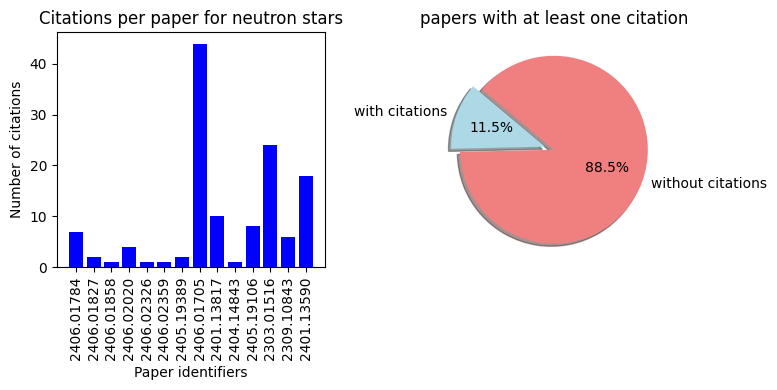

In [2]:
process_latest_papers_and_find_citations('neutron stars')

# Occurence of the string `"supernovae"` in today's astro-ph arXiv papers

Getting paper identifiers XXXX.YYYYY from listing: https://arxiv.org/list/astro-ph/new

Scraping paper: https://arxiv.org/pdf/2406.01720.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.01752.pdf
Number of citations: 3 (+++)

Scraping paper: https://arxiv.org/pdf/2406.01784.pdf
Number of citations: 21 (+++++++++++++++++++++)

Scraping paper: https://arxiv.org/pdf/2406.01817.pdf
Number of citations: 3 (+++)

Scraping paper: https://arxiv.org/pdf/2406.01858.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.01871.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.02019.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.02072.pdf
Number of citations: 11 (+++++++++++)

Scraping paper: https://arxiv.org/pdf/2406.02073.pdf
Number of citations: 3 (+++)

Scraping paper: https://arxiv.org/pdf/2406.02196.pdf
Number of citations: 1 (+)

Scraping paper: https://arxiv.org/pdf/2406.02334.pdf
Number of c

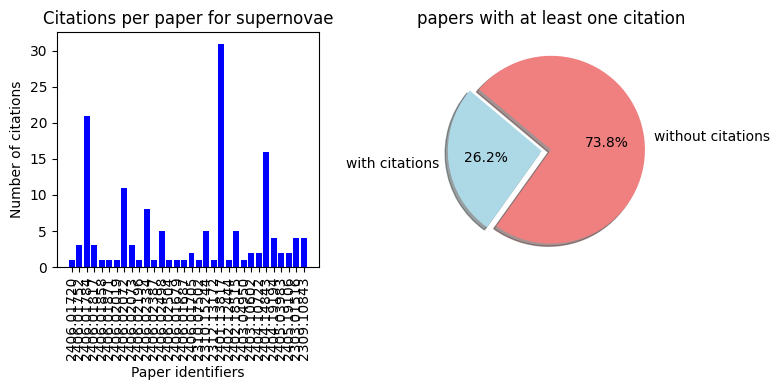

In [4]:
process_latest_papers_and_find_citations('supernovae')